## Importación de librerías

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Primera carga de datos y visualización previa

In [184]:
# cargar el archivo marketingcampaigns_corrected.csv (datos corregidos)
df = pd.read_csv('../data/marketingcampaigns_corrected.csv')
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1032,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1033,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00
1034,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.00
1035,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.00


In [185]:
# información preliminar de los datos
'''
campaign_name -----> nombre_de_campaña
start_date --------> fecha_de_inicio
end_date ----------> fecha_de_finalización
budget ------------> presupuesto objetivo
roi ---------------> ROI "retorno de la inversión" (Return On Investment)
type --------------> tipo
target_audience ---> público_objetivo
channel -----------> canal
conversion_rate ---> tasa_de_conversión
revenue -----------> ingresos
'''
df.info()
# OBSERVACIONES:
# start_date y end_date son de tipo object, se deben convertir a datetime
# conversion_rate es de tipo object, se debe convertir a float
# revenue es de tipo object, se debe convertir a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1037 non-null   object 
 1   start_date       1036 non-null   object 
 2   end_date         1035 non-null   object 
 3   budget           1034 non-null   object 
 4   roi              1033 non-null   float64
 5   type             1036 non-null   object 
 6   target_audience  1035 non-null   object 
 7   channel          1036 non-null   object 
 8   conversion_rate  1033 non-null   float64
 9   revenue          1034 non-null   float64
dtypes: float64(3), object(7)
memory usage: 81.1+ KB


In [186]:
df.describe()
# OBSERVACIONES:
# hay al menos un registro con valores negativos de roi y revenue
# hay valores demasiado separados (desviación estándar muy grande) en budget

,roi,conversion_rate,revenue
count,1033.000000,1033.000000,1034.000000
mean,0.533553,0.541946,509901.685667
std,0.261510,0.267271,287916.037107
min,-0.200000,0.000000,-15000.000000
25%,0.310000,0.300000,266545.580000
50%,0.530000,0.550000,516907.835000
75%,0.760000,0.770000,764547.970000
max,0.990000,1.500000,999712.490000


In [187]:
print(df.isnull().sum())
print(f"Suma de maximo de registros con nulos: {df.isnull().sum().sum()}")
# OBSERVACIONES:
# hay valores nulos a corregir en todas las columnas

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64
Suma de maximo de registros con nulos: 21


In [188]:
# convertir los datos de las columnas 'budget', 'roi', 'conversion_rate' y 'revenue' a numéricos, y reemplazar valores no numericos por NaN
for column in ['budget', 'roi', 'conversion_rate', 'revenue']:
  df[column] = pd.to_numeric(df[column], errors='coerce')
print(df.isnull().sum())

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64


vemos que hay un registro adicional en el campo 'budget' que no es un número, por lo que se debe convertir a NaN para poder trabajar con el campo.

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1037 non-null   object 
 1   start_date       1036 non-null   object 
 2   end_date         1035 non-null   object 
 3   budget           1033 non-null   float64
 4   roi              1033 non-null   float64
 5   type             1036 non-null   object 
 6   target_audience  1035 non-null   object 
 7   channel          1036 non-null   object 
 8   conversion_rate  1033 non-null   float64
 9   revenue          1034 non-null   float64
dtypes: float64(4), object(6)
memory usage: 81.1+ KB


## Primera limpieza de datos
Se eliminarán los registros que contengan valores de nulos que, por su importancia o por su cantidad en el registro, hagan que el registro sea inútil para el análisis.

In [190]:
# nuevo campo que indica la cantidad de nulos en cada registro (este campo se eliminará más adelante)
df['num_nulls'] = df.isnull().sum(axis=1)

# Ordenar el DataFrame por la columna de número de nulos en orden descendente
df_sorted_by_nulls = df.sort_values(by='num_nulls', ascending=False)

# Mostrar los registros con nulos, ordenados por número de nulos en cada registro
df_sorted_by_nulls[df_sorted_by_nulls['num_nulls'] > 0]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1029,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN,6
1033,Random mess,2023-06-06,NaN,100000.00,NaN,podcast,NaN,referral,NaN,300000.00,4
1026,Cloud-based scalable solution,NaN,2023-12-31,50000.00,NaN,event,B2C,paid,0.30,120000.00,2
1034,Invalid budget,2022-12-01,2023-06-01,NaN,NaN,email,B2C,promotion,0.20,50000.00,2
1008,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00,2
1027,Broken-date campaign,2023-13-01,2024-01-01,25000.00,0.45,email,B2B,organic,NaN,87500.00,1
1028,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,NaN,1
1005,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11,1
1031,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00,1
1032,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN,1


In [191]:
# eliminar registros con un número de nulos por registro mayor a 1
df = df[df['num_nulls'] <= 1]
df[df['num_nulls'] > 0]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1005,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11,1
1007,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,NaN,B2C,promotion,0.52,206241.46,1
1027,Broken-date campaign,2023-13-01,2024-01-01,25000.00,0.45,email,B2B,organic,NaN,87500.00,1
1028,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,NaN,1
1031,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00,1
1032,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN,1


In [192]:
# dividir registros por tipo de dato object, y hallar la cantidad de valores únicos en cada columna para ver si hay errores
print(df.groupby('type').size())
print(f'Suma de registros: {df.groupby('type').size().sum()}\n')
print(df.groupby('channel').size())
print(f'Suma de registros: {df.groupby('channel').size().sum()}\n')
print(df.groupby('target_audience').size())
print(f'Suma de registros: {df.groupby('target_audience').size().sum()}\n')
print(f'Suma de registros totales: {df['campaign_name'].count()}')

# OBSERVACIONES:
# hay un valor incorrecto (referal) en la columna channel --> cambiar por referral
# el resto de valores son consistentes (no se detectan otros errores de escritura)

type
email           288
podcast         233
social media    242
webinar         268
dtype: int64
Suma de registros: 1031

channel
organic      249
paid         243
promotion    281
referal        1
referral     258
dtype: int64
Suma de registros: 1032

target_audience
B2B    530
B2C    501
dtype: int64
Suma de registros: 1031

Suma de registros totales: 1032


## Corrección de errores a nivel de datos
1. ESCRITURA DE DATOS
* hay un valor incorrecto (referal) en la columna channel --> cambiar por referral

2. NULOS
* hay valores nulos a corregir en las columnas: `budget`, `type`, `target_audience`, `conversion_rate` y `revenue`

3. TYPADO
* start_date y end_date son de tipo object, se deben convertir a datetime
* conversion_rate es de tipo object, se debe convertir a float
* revenue es de tipo object, se debe convertir a float

4. DISPERSIÓN
* hay al menos un registro con valores negativos de roi y revenue
* hay valores demasiado separados (desviación estándar muy grande) en budget

### 1. ESCRITURA DE DATOS

In [193]:
# cambiar el valor referal por referral en la columna channel
df.loc[df['channel'] == 'referal', 'channel'] = 'referral'
print(df.groupby('channel').size())
print(f'Suma de registros: {df.groupby('channel').size().sum()}\n')

channel
organic      249
paid         243
promotion    281
referral     259
dtype: int64
Suma de registros: 1032



### 2. NULOS Y DISPERSIÓN DE DATOS

In [194]:
# suma de valores nulos en cada columna
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             1
roi                0
type               1
target_audience    1
channel            0
conversion_rate    1
revenue            2
num_nulls          0
dtype: int64

#### 2.1. Columna `type`

In [195]:
# registro con valores nulos en la columna type
df[df['type'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1007,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,NaN,B2C,promotion,0.52,206241.46,1


In [196]:
# contar registros con los valores channel=promotion y target_audence=B2C, agrupados por type
df[(df['channel'] == 'promotion') & (df['target_audience'] == 'B2C')].groupby('type').size()

type
email           37
podcast         30
social media    23
webinar         39
dtype: int64

In [197]:
# cambiar el valor nulo en la columna type por 'others' (por el nombre de campaign_name, se puede catalogar como 'others')
df.loc[df['type'].isnull(), 'type'] = 'others'
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             1
roi                0
type               0
target_audience    1
channel            0
conversion_rate    1
revenue            2
num_nulls          0
dtype: int64

#### 2.2. Columna `budget`
Correción de nulos en la columna `budget`.

In [198]:
# registro con valores nulos en la columna budget
df[df['budget'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1005,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11,1


In [199]:
# print(f'Media de la columna \'budget\': {df['budget'].mean()}')
# print(f'\nMedia de \'budget\': {df[(df['target_audience'] == 'B2C') &
#                                     (df['type'] == 'social media')]['budget'].mean()}\nfiltros\n\ttype: social media\n\ttarget_audience: B2C\t')
# print(f'\nMedia de \'budget\': {df[(df['target_audience'] == 'B2C') &
#                                     (df['type'] == 'social media') &
#                                       (df['channel'] == 'referral')]['budget'].mean()}\nfiltros\n\ttype: social media\n\ttarget_audience: B2C\n\tchannel: referral\t')

df[(df['target_audience'] == 'B2C') & (df['type'] == 'social media') & (df['channel'] == 'referral')].sort_values(by='revenue', ascending=False)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
373,Configurable client-driven migration,2022-12-09,2024-03-10,21172.32,0.16,social media,B2C,referral,0.32,972694.30,0
704,Innovative intangible complexity,2022-09-03,2024-03-04,19992.62,0.46,social media,B2C,referral,0.62,910901.40,0
466,Reduced content-based Graphic Interface,2022-10-26,2024-03-03,16945.29,0.72,social media,B2C,referral,0.76,884669.86,0
89,Stand-alone bandwidth-monitored capability,2022-10-10,2024-03-29,89383.19,0.83,social media,B2C,referral,0.77,828963.15,0
424,Mandatory 3rdgeneration matrices,2023-07-02,2023-10-28,29709.16,0.86,social media,B2C,referral,0.12,811850.37,0
169,Ergonomic next generation hub,2022-12-18,2024-01-27,27079.85,0.32,social media,B2C,referral,0.30,784636.20,0
976,User-centric clear-thinking interface,2022-08-28,2024-05-27,29206.80,0.60,social media,B2C,referral,0.34,628376.14,0
980,Reverse-engineered 4thgeneration analyzer,2022-12-24,2023-11-03,35539.13,0.53,social media,B2C,referral,0.68,579364.90,0
1023,Intuitive responsive support,2022-11-25,2024-04-04,1816.22,0.81,social media,B2C,referral,0.85,563280.30,0
9,Intuitive responsive support,2022-11-25,2024-04-04,1816.22,0.81,social media,B2C,referral,0.85,563280.30,0


comprobado que el valor faltante en la columna budget corresponde con un registro repetido, se elimina el registro.

In [200]:
# eliminación de registros con valores nulos en la columna budget
df = df.dropna(subset=['budget'])

In [201]:
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    1
channel            0
conversion_rate    1
revenue            2
num_nulls          0
dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 0 to 1036
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1031 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1031 non-null   object 
 3   budget           1031 non-null   float64
 4   roi              1031 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1030 non-null   float64
 9   revenue          1029 non-null   float64
 10  num_nulls        1031 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 96.7+ KB


**Eliminación de outliers en la columna `budget`**

Aprovecharemos para eliminar los outliers en la columna `budget` que se encuentran a más de 3 desviaciones estándar de la media, así como los valores negativos.

In [203]:
# eliminar los outliers en la columna `budget` que se encuentran a más de 3 desviaciones estándar de la media
df = df[np.abs(df['budget'] - df['budget'].mean()) <= (3 * df['budget'].std())]
df.sort_values(by='budget', ascending=False)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
53,User-centric holistic firmware,2022-08-06,2024-03-12,99957.15,0.63,webinar,B2C,referral,0.62,430498.24,0
330,Persistent radical approach,2022-10-23,2023-08-15,99891.35,0.80,email,B2C,promotion,0.91,8272.50,0
28,Seamless clear-thinking product,2022-11-18,2023-10-05,99838.63,0.63,email,B2B,organic,0.18,14073.59,0
710,Horizontal asymmetric contingency,2022-09-16,2024-05-08,99714.19,0.23,email,B2C,referral,0.70,7622.28,0
935,Innovative logistical interface,2023-03-05,2023-10-25,99579.39,0.10,social media,B2C,organic,0.28,758121.44,0
...,...,...,...,...,...,...,...,...,...,...,...
835,Enhanced optimizing time-frame,2022-11-06,2024-04-02,1378.61,0.15,email,B2B,organic,0.66,862862.99,0
38,Vision-oriented 4thgeneration conglomeration,2023-01-18,2024-04-22,1309.17,0.91,podcast,B2C,organic,0.27,273231.88,0
887,Synchronized national system engine,2023-01-18,2023-11-11,1223.82,0.71,social media,B2C,paid,0.30,768567.70,0
252,Persevering zero administration interface,2023-03-27,2023-10-25,1052.57,0.37,email,B2C,promotion,0.44,932323.35,0


In [204]:
# eliminar los registros con valores negativos en las columnas `budget` y `roi`
df = df[(df['budget'] >= 0) & (df['roi'] >= 0)]
df.sort_values(by='budget', ascending=False)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
53,User-centric holistic firmware,2022-08-06,2024-03-12,99957.15,0.63,webinar,B2C,referral,0.62,430498.24,0
330,Persistent radical approach,2022-10-23,2023-08-15,99891.35,0.80,email,B2C,promotion,0.91,8272.50,0
28,Seamless clear-thinking product,2022-11-18,2023-10-05,99838.63,0.63,email,B2B,organic,0.18,14073.59,0
710,Horizontal asymmetric contingency,2022-09-16,2024-05-08,99714.19,0.23,email,B2C,referral,0.70,7622.28,0
935,Innovative logistical interface,2023-03-05,2023-10-25,99579.39,0.10,social media,B2C,organic,0.28,758121.44,0
...,...,...,...,...,...,...,...,...,...,...,...
766,Multi-tiered context-sensitive hub,2023-06-20,2024-05-24,1380.68,0.46,podcast,B2C,promotion,0.84,159621.36,0
835,Enhanced optimizing time-frame,2022-11-06,2024-04-02,1378.61,0.15,email,B2B,organic,0.66,862862.99,0
38,Vision-oriented 4thgeneration conglomeration,2023-01-18,2024-04-22,1309.17,0.91,podcast,B2C,organic,0.27,273231.88,0
887,Synchronized national system engine,2023-01-18,2023-11-11,1223.82,0.71,social media,B2C,paid,0.30,768567.70,0


#### 2.3. Columna `target_audience`
Correción de nulos en la columna `target_audience`.

In [205]:
# registro con valores nulos en la columna type
df[df['target_audience'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1031,Extra long name campaign test,2023-04-15,2023-09-15,30000.0,0.25,email,NaN,paid,0.4,45000.0,1


In [206]:
df[(df['type'] == 'email') & (df['channel'] == 'paid')].sort_values(by='revenue', ascending=False)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
108,User-centric responsive software,2022-09-24,2023-08-04,55105.95,0.39,email,B2B,paid,0.65,980593.34,0
257,Self-enabling reciprocal algorithm,2022-11-01,2024-07-29,8645.67,0.12,email,B2B,paid,0.37,961551.85,0
635,Intuitive didactic interface,2022-09-06,2024-07-17,41350.29,0.82,email,B2C,paid,0.18,953178.97,0
32,Seamless zero-defect portal,2022-08-12,2024-07-19,71277.10,0.21,email,B2B,paid,0.56,932824.61,0
734,Grass-roots client-server middleware,2023-01-04,2023-11-10,41458.15,0.97,email,B2B,paid,0.21,924885.11,0
...,...,...,...,...,...,...,...,...,...,...,...
681,Organic actuating firmware,2023-07-07,2023-10-03,38665.10,0.14,email,B2B,paid,0.29,74042.78,0
458,Customizable global hierarchy,2023-04-26,2023-10-12,86716.38,0.74,email,B2B,paid,0.95,69360.86,0
1031,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00,1
862,Inverse system-worthy utilization,2022-08-25,2023-08-15,17398.10,0.22,email,B2C,paid,0.60,36397.45,0


In [207]:
print(f'Moda target_audience: {df['target_audience'].mode()[0]}\n')
print(f'Moda target_audience: {df[(df['type'] == 'email') & (df['channel'] == 'paid')]['target_audience'].mode()[0]}\nFiltros\n\ttype: email\n\tchannel: paid\n')
print(f'Moda target_audience: {df[df['type'] == 'email']['target_audience'].mode()[0]}\nFiltros\n\ttype: email\n')
print(f'Moda target_audience: {df[df['channel'] == 'paid']['target_audience'].mode()[0]}\nFiltros\n\tchannel: paid\n')

Moda target_audience: B2B

Moda target_audience: B2B
Filtros
	type: email
	channel: paid

Moda target_audience: B2B
Filtros
	type: email

Moda target_audience: B2C
Filtros
	channel: paid



Siendo la mayoría de las modas de registros similares 'B2B', se reemplazarán los nulos por ese valor.

In [208]:
# cambiar el valor nulo en la columna target_audience por la moda seleccionada
df.loc[df['target_audience'].isnull(), 'target_audience'] = 'B2B'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1036
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1029 non-null   object 
 1   start_date       1029 non-null   object 
 2   end_date         1029 non-null   object 
 3   budget           1029 non-null   float64
 4   roi              1029 non-null   float64
 5   type             1029 non-null   object 
 6   target_audience  1029 non-null   object 
 7   channel          1029 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1028 non-null   float64
 10  num_nulls        1029 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 96.5+ KB


#### 2.4. Columna `conversion_rate`
Eliminación de nulos en la columna `conversion_rate`, y detección de outliers.

In [209]:
df.describe()

,budget,roi,conversion_rate,revenue,num_nulls
count,1029.000000,1029.000000,1028.000000,1028.000000,1029.000000
mean,49204.260408,0.534908,0.543152,511785.059212,0.003887
std,28830.897212,0.260507,0.267001,287334.011917,0.062257
min,1052.570000,0.000000,0.000000,-15000.000000,0.000000
25%,24633.170000,0.310000,0.300000,267735.687500,0.000000
50%,46790.730000,0.530000,0.550000,517944.035000,0.000000
75%,74720.700000,0.760000,0.770000,765929.257500,0.000000
max,99957.150000,0.990000,1.500000,999712.490000,1.000000


In [210]:
df[df['conversion_rate'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1027,Broken-date campaign,2023-13-01,2024-01-01,25000.0,0.45,email,B2B,organic,NaN,87500.0,1


> Nota: sabiendo que los valores de algunos registros no son correctos, procederemos a aproximarlos con un valor similar.

In [211]:
# se tomará la media de los registros similares (type=email, channel=organic, target_audience=B2B) para reemplazar el valor nulo
conversion_rate_aprox = round(df[(df['type'] == 'email') & (df['channel'] == 'organic') & (df['target_audience'] == 'B2B')]['conversion_rate'].mean(), 2)
df.loc[df['conversion_rate'].isnull(), 'conversion_rate'] = conversion_rate_aprox
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1036
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1029 non-null   object 
 1   start_date       1029 non-null   object 
 2   end_date         1029 non-null   object 
 3   budget           1029 non-null   float64
 4   roi              1029 non-null   float64
 5   type             1029 non-null   object 
 6   target_audience  1029 non-null   object 
 7   channel          1029 non-null   object 
 8   conversion_rate  1029 non-null   float64
 9   revenue          1028 non-null   float64
 10  num_nulls        1029 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 96.5+ KB


In [218]:
df.sort_values(by='conversion_rate', ascending=False)[:10]
# df.sort_values(by='conversion_rate')[:20]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
454,Vision-oriented transitional process improvement,2023-06-27,2023-11-26,55436.70,0.80,podcast,B2B,organic,0.99,786705.70,0
712,Reverse-engineered attitude-oriented task-force,2023-03-12,2024-07-28,82832.93,0.73,social media,B2B,organic,0.99,974376.54,0
206,Switchable mobile toolset,2023-06-25,2024-04-16,59590.26,0.83,podcast,B2B,referral,0.99,574709.76,0
140,Compatible eco-centric access,2022-08-24,2023-09-04,4016.62,0.62,social media,B2B,referral,0.99,773055.56,0
697,Customizable clear-thinking adapter,2023-07-22,2024-04-30,74856.71,0.43,podcast,B2B,referral,0.99,266833.31,0
99,Synergistic actuating benchmark,2022-12-14,2023-08-20,13024.35,0.20,email,B2C,organic,0.99,882368.60,0
276,Function-based exuding strategy,2023-04-30,2024-02-25,87156.45,0.40,social media,B2C,referral,0.99,95274.70,0
886,Sharable background circuit,2022-08-26,2024-06-15,39380.23,0.58,email,B2B,referral,0.99,878859.45,0
504,Advanced client-driven matrix,2023-07-02,2024-06-24,58920.71,0.74,social media,B2B,organic,0.99,416433.63,0
173,Customer-focused fault-tolerant help-desk,2022-10-08,2023-12-25,39585.98,0.11,podcast,B2B,promotion,0.99,889037.24,0


se eliminan los registros con valores anómalos (conversion_rate > 1) en la columna `conversion_rate`.

In [213]:
# borrar el registro con valor conversion_rate = 1.5 (es un outlier)
df = df[df['conversion_rate'] <= 1]
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,0
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,0
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,0
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,0
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,0
...,...,...,...,...,...,...,...,...,...,...,...
1027,Broken-date campaign,2023-13-01,2024-01-01,25000.00,0.45,email,B2B,organic,0.62,87500.00,1
1030,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00,0
1031,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,B2B,paid,0.40,45000.00,1
1032,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN,1


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1035
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1028 non-null   object 
 1   start_date       1028 non-null   object 
 2   end_date         1028 non-null   object 
 3   budget           1028 non-null   float64
 4   roi              1028 non-null   float64
 5   type             1028 non-null   object 
 6   target_audience  1028 non-null   object 
 7   channel          1028 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1027 non-null   float64
 10  num_nulls        1028 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 96.4+ KB


#### 2.5. Columna `revenue`
Eliminación de nulos en la columna `revenue`, y detección de outliers.

In [215]:
df.sort_values(by='revenue', ascending=False)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
170,Realigned radical hardware,2022-11-03,2024-07-12,34512.86,0.20,webinar,B2B,referral,0.87,999712.49,0
618,Automated executive moderator,2022-09-03,2024-01-06,65864.61,0.29,social media,B2B,promotion,0.19,999317.92,0
880,Balanced optimizing software,2023-04-10,2024-05-10,10297.36,0.95,podcast,B2B,paid,0.71,997657.18,0
626,Realigned scalable moderator,2023-04-07,2023-10-03,55780.60,0.54,email,B2B,referral,0.19,996578.25,0
758,Function-based leadingedge budgetary management,2022-12-16,2023-08-23,64755.70,0.63,webinar,B2B,referral,0.20,996493.10,0
...,...,...,...,...,...,...,...,...,...,...,...
427,Programmable homogeneous projection,2022-09-24,2023-11-12,11006.30,0.25,podcast,B2C,promotion,0.98,3641.30,0
975,Extended 24hour contingency,2023-07-07,2023-08-18,69815.82,0.16,podcast,B2C,organic,0.27,2810.51,0
889,Grass-roots scalable framework,2023-02-16,2023-08-19,61978.10,0.39,social media,B2C,paid,0.77,108.21,0
1010,Negative Revenue Test,2023-05-15,2023-11-15,25000.00,0.45,podcast,B2B,paid,0.33,-15000.00,0


Vemos que los dos últimos registros tienen valores negativos o nulos en la columna `revenue`, por lo que se eliminarán.

In [216]:
df = df[df['revenue'] > 0]
df.sort_values(by='revenue', ascending=False)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
170,Realigned radical hardware,2022-11-03,2024-07-12,34512.86,0.20,webinar,B2B,referral,0.87,999712.49,0
618,Automated executive moderator,2022-09-03,2024-01-06,65864.61,0.29,social media,B2B,promotion,0.19,999317.92,0
880,Balanced optimizing software,2023-04-10,2024-05-10,10297.36,0.95,podcast,B2B,paid,0.71,997657.18,0
626,Realigned scalable moderator,2023-04-07,2023-10-03,55780.60,0.54,email,B2B,referral,0.19,996578.25,0
758,Function-based leadingedge budgetary management,2022-12-16,2023-08-23,64755.70,0.63,webinar,B2B,referral,0.20,996493.10,0
...,...,...,...,...,...,...,...,...,...,...,...
821,Universal uniform service-desk,2023-07-10,2024-05-16,37054.16,0.39,email,B2B,referral,0.60,5971.96,0
14,Innovative web-enabled function,2022-11-05,2023-09-05,36848.30,0.92,webinar,B2C,referral,0.10,4190.95,0
427,Programmable homogeneous projection,2022-09-24,2023-11-12,11006.30,0.25,podcast,B2C,promotion,0.98,3641.30,0
975,Extended 24hour contingency,2023-07-07,2023-08-18,69815.82,0.16,podcast,B2C,organic,0.27,2810.51,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1035
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1026 non-null   object 
 1   start_date       1026 non-null   object 
 2   end_date         1026 non-null   object 
 3   budget           1026 non-null   float64
 4   roi              1026 non-null   float64
 5   type             1026 non-null   object 
 6   target_audience  1026 non-null   object 
 7   channel          1026 non-null   object 
 8   conversion_rate  1026 non-null   float64
 9   revenue          1026 non-null   float64
 10  num_nulls        1026 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 96.2+ KB


### 3. TIPADO DE DATOS

In [219]:
df.head()

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,0
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,0
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,0
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,0
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,0


In [ ]:
df[df['start_date'] == '2023-13-01']
# visto que hay un registro con las fechas start_date mal formateada, y una fecha end_date incoherente, se procederá a eliminar el registro
# se corregirá a continuación el registro con fecha start_date mal formateada

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls
1009,Typo in Date,2023-13-01,2024-02-30,50000.0,0.65,webinar,B2C,promotion,0.90,320000.0,0
1027,Broken-date campaign,2023-13-01,2024-01-01,25000.0,0.45,email,B2B,organic,0.62,87500.0,1


In [239]:
# se elimina el registro incorrecto
df = df[df['end_date'] != '2024-02-30']

# corregimos el registro con fecha mal formateada
df['start_date'] = df['start_date'].replace('2023-13-01', '2023-01-13')
df[df['start_date'] == '2023-13-01']


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,num_nulls


# ---> NOS HEMOS QUEDADO POR AQUÍ <---

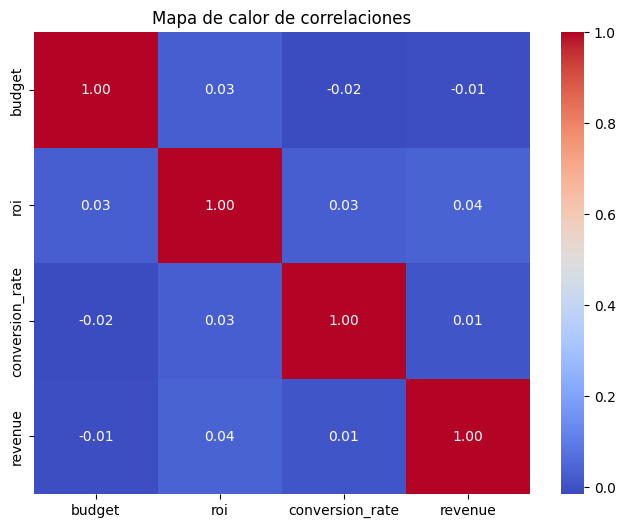

In [180]:
# Seleccionar las columnas relevantes
columns_of_interest = ['budget', 'roi', 'conversion_rate', 'revenue']
correlation_matrix = df[columns_of_interest].corr()

# Crear el mapa de calor con la correlación entre los campos seleccionados
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

In [83]:
df.describe()

,budget,roi,conversion_rate,revenue,num_nulls
count,1029.000000,1029.000000,1028.000000,1028.000000,1029.000000
mean,49204.260408,0.534908,0.543152,511785.059212,0.003887
std,28830.897212,0.260507,0.267001,287334.011917,0.062257
min,1052.570000,0.000000,0.000000,-15000.000000,0.000000
25%,24633.170000,0.310000,0.300000,267735.687500,0.000000
50%,46790.730000,0.530000,0.550000,517944.035000,0.000000
75%,74720.700000,0.760000,0.770000,765929.257500,0.000000
max,99957.150000,0.990000,1.500000,999712.490000,1.000000
